In [ ]:
!nvidia-smi

Sun Jan  9 09:14:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -U --pre efficientnet

     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
from tensorflow.keras.applications import EfficientNetB2 as Net
dropout_rate = 0.4
def load_new_model_tip(num_classes):
    conv_base = Net(weights='imagenet', include_top=False, input_shape=(250,250,3))

    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalMaxPooling2D(name="gap"))
    # model.add(layers.Flatten(name="flatten"))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate, name="dropout_out"))
    model.add(layers.Dense(256, activation='relu', name="fc1"))
    model.add(layers.Dense(2, activation='softmax', name="fc_out"))
    conv_base.trainable = False

    model.compile(loss = 'categorical_crossentropy',optimizer=optimizers.Adam( learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),
    metrics=['acc'])

    return model

In [ ]:
trained_notsmoke_files = ['/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/{}.png'.format(i) for i in range(1, 2116)]

In [ ]:
trained_notsmoke_files = ['/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/{}.jpg'.format(i) for i in range(2001, 2116)]

In [ ]:
trained_notsmoke_files = ['/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/{}.png'.format(i) for i in range(1501, 2000)]

In [ ]:
len(trained_notsmoke_files)

2115

In [ ]:
trained_notsmoke_files[0]

'/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2001.jpg'

In [ ]:
for file in trained_notsmoke_files[:]:
    print(file)

/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2001.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2002.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2003.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2004.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2005.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2006.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2007.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2008.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2009.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2010.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2011.jpg
/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/2012.jpg
/content/drive/MyDrive/EfficientNetSmoke

In [ ]:
file[71:]

'2115.jpg'

In [ ]:
import imageio
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator()
for file in trained_notsmoke_files[1501:]:
    print(file)
    #src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(file)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    #file_dst = file.replace("-", "-flipped_horizontal_image-")
    #dst_file_path = os.path.join(train_ahmed_dir, file_dst)

    imageio.imwrite('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/'+ 'AugmentedFlipHori'+file[71:] , flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    #file_dst = file.replace("-", "-flipped_vertical_image-")
    #dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/'+ 'AugmentedFlipVer'+file[71:] , flipped_ver_img)
    
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    #file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    #dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    #imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    imageio.imwrite('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/'+ 'AugmentedFlipHorVer'+file[71:] , flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    #file_dst = file.replace("-", "-sheared_image-")
    #dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/'+ 'AugmentedShear'+file[71:] , sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        print(angle)
        #file_dst = file.replace("-", "-" + str(angle) + "-")
        #dst_file_path = os.path.join(train_ahmed_dir, file_dst)
        #/content/gdrive/MyDrive/EfficientNet/training/not_empty
        imageio.imwrite('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/'+ 'AugmentedRotate'+str(angle)+file[71:] , rotated_img)
        #imageio.imwrite(dst_file_path, rotated_img)
    


In [ ]:
train_path = '/content/drive/MyDrive/EfficientNetSmokeClasssification/Train'
BS = 32
valid_path = '/content/drive/MyDrive/EfficientNetSmokeClasssification/Validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')  # val 20%

val_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(train_path, 
                                               target_size=(250, 250), 
                                               color_mode='rgb',
                                               batch_size=BS, 
                                               class_mode='categorical',
                                               shuffle=True) 

val_data = val_datagen.flow_from_directory(valid_path, 
                                           target_size=(250, 250), 
                                           color_mode='rgb',
                                           batch_size=BS, 
                                           class_mode='categorical',
                                           shuffle=True)
train_data.class_indices
#Train
#smoke 1365
#default 1159

Found 19331 images belonging to 2 classes.
Found 1313 images belonging to 2 classes.


{'NotSmoke': 0, 'Smoke': 1}

(32, 250, 250, 3)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


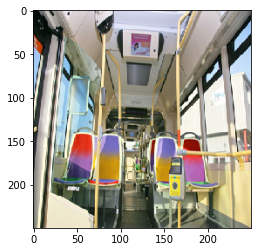

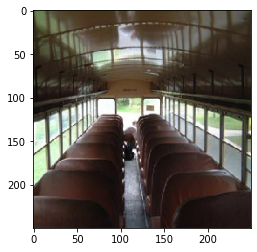

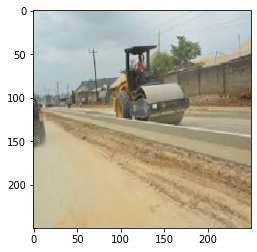

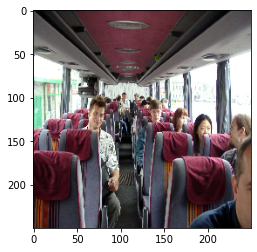

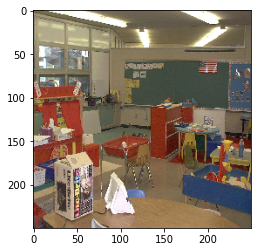

In [ ]:
import matplotlib.pyplot as plt
for i in range(1):
    img,label = val_data[i]
    print(img.shape)   #  (1,256,256,3)
    print(label)
    for j in range(5):
      plt.imshow(img[j])
      plt.show()

(32, 250, 250, 3)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


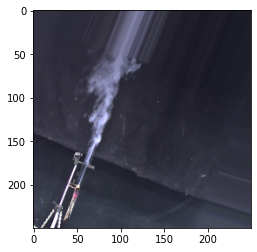

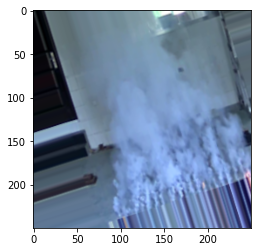

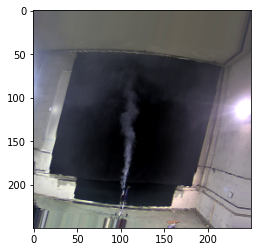

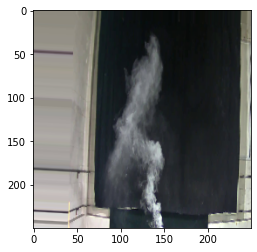

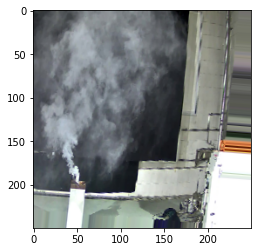

In [ ]:
import matplotlib.pyplot as plt
for i in range(1):
    img,label = train_data[i]
    print(img.shape)   #  (1,256,256,3)
    print(label)
    for j in range(5):
      plt.imshow(img[j])
      plt.show()

In [ ]:
model = load_new_model_tip(2)
model.summary()

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 8, 8, 1408)       7768569   
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1408)              0         
                                                                 
 dropout_out (Dropout)       (None, 1408)              0         
                                                                 
 fc1 (Dense)                 (None, 256)               360704    
                                                                 
 fc_out (Dense)              (None, 2)                 514       
                                                                 
Total params: 8,129,787
Trainable params: 361,218
Non-trainable params: 7,768,569
_________________________________________

In [ ]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))
print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))                                               

This is the number of trainable layers before freezing the conv base: 4
This is the number of trainable layers after freezing the conv base: 4


In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

my_callbacks = [
    callbacks.EarlyStopping(patience=10,monitor='loss'),
    callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True),
    callbacks.TensorBoard(log_dir='./logs')
]
epochs = 10
history = model.fit_generator(
      train_data,
      steps_per_epoch= 19331//32,
      epochs=epochs,
      validation_data=val_data,
      validation_steps= 1313 //32,
      verbose=1,
      callbacks = my_callbacks)
model.save('/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassification1.h5')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
604/604 [==============================] - 5795s 10s/step - loss: 0.0367 - accuracy: 0.9917 - val_loss: 3.0811 - val_accuracy: 0.3704
Epoch 2/10
604/604 [==============================] - 1021s 2s/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.6702 - val_accuracy: 0.8468
Epoch 3/10
604/604 [==============================] - 1003s 2s/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 1.1252 - val_accuracy: 0.8095
Epoch 4/10
604/604 [==============================] - 988s 2s/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.8937 - val_accuracy: 0.8239
Epoch 5/10
604/604 [==============================] - 992s 2s/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 1.5242 - val_accuracy: 0.6547
Epoch 6/10
604/604 [==============================] - 974s 2s/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.5052 - val_accuracy: 0.8544
Epoch 7/10
604/604 [==============================] - 1053s 2s/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.3639 - val_accuracy: 0

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

my_callbacks = [
    callbacks.EarlyStopping(patience=5,monitor = 'val_accuracy', mode = 'max',verbose = 1),
    callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationBest.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,verbose = 1),
    callbacks.TensorBoard(log_dir='./logs')
]
epochs = 10
history = model.fit_generator(
      train_data,
      steps_per_epoch= 19331//32,
      epochs=epochs,
      validation_data=val_data,
      validation_steps= 1313 //32,
      verbose=1,
      callbacks = my_callbacks)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
604/604 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9764
Epoch 00001: val_accuracy improved from -inf to 0.71113, saving model to /content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationBest.h5
604/604 [==============================] - 5459s 9s/step - loss: 0.1558 - accuracy: 0.9764 - val_loss: 0.9384 - val_accuracy: 0.7111
Epoch 2/10
604/604 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9965
Epoch 00002: val_accuracy improved from 0.71113 to 0.74695, saving model to /content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationBest.h5
604/604 [==============================] - 1033s 2s/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.8737 - val_accuracy: 0.7470
Epoch 3/10
604/604 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9979
Epoch 00003: val_accuracy improved from 0.74695 to 0.84604, saving model to /content/drive/MyDrive/EfficientNetSmokeCla

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

my_callbacks = [
    callbacks.EarlyStopping(patience=10,monitor = 'val_accuracy', mode = 'max',verbose = 1),
    callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationBest1.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,verbose = 1),
    callbacks.TensorBoard(log_dir='./logs')
]
epochs = 10
history = model.fit_generator(
      train_data,
      steps_per_epoch= 19331//32,
      epochs=epochs,
      validation_data=val_data,
      validation_steps= 1313 //32,
      verbose=1,
      callbacks = my_callbacks)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
604/604 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9842
Epoch 00001: val_accuracy improved from -inf to 0.90854, saving model to /content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationBest1.h5
604/604 [==============================] - 6136s 10s/step - loss: 0.0661 - accuracy: 0.9842 - val_loss: 0.2674 - val_accuracy: 0.9085
Epoch 2/10
604/604 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9965
Epoch 00002: val_accuracy did not improve from 0.90854
604/604 [==============================] - 1029s 2s/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.5502 - val_accuracy: 0.8613
Epoch 3/10
604/604 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9979
Epoch 00003: val_accuracy did not improve from 0.90854
604/604 [==============================] - 994s 2s/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 2.8875 - val_accuracy: 0.5396
Epoch 4/10
604/604 [====================

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

my_callbacks = [
    callbacks.EarlyStopping(patience=5,monitor = 'val_accuracy', mode = 'max',verbose = 1),
    callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationEarlyStop.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,verbose = 1),
    callbacks.TensorBoard(log_dir='./logs')
]
epochs = 10
history = model.fit_generator(
      train_data,
      steps_per_epoch= 19331//32,
      epochs=epochs,
      validation_data=val_data,
      validation_steps= 1313 //32,
      verbose=1,
      callbacks = my_callbacks)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/10
604/604 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9826 
Epoch 00001: val_accuracy improved from -inf to 0.44207, saving model to /content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationEarlyStop.h5
604/604 [==============================] - 6533s 11s/step - loss: 0.0752 - accuracy: 0.9826 - val_loss: 2.8295 - val_accuracy: 0.4421
Epoch 2/10
604/604 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9972
Epoch 00002: val_accuracy improved from 0.44207 to 0.94055, saving model to /content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationEarlyStop.h5
604/604 [==============================] - 1205s 2s/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.2119 - val_accuracy: 0.9405
Epoch 3/10
604/604 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9977
Epoch 00003: val_accuracy did not improve from 0.94055
604/604 [==============================] - 1235s 2s/

In [ ]:
#Best Model
#from tensorflow.keras.preprocessing import image as image_keras
from tensorflow.keras.preprocessing import image
from keras import models    
import numpy as np

model = models.load_model('/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassificationEarlyStop.h5')

#recover class names from the train dataset generator
class_lookup = {0:'NotSmoke', 1:'Smoke'}

def predict_image(img_path, class_lookup):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(250, 250))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    result_verbose = model.predict([x])
    print(result_verbose)
    predicted_class = class_lookup[np.argmax(result_verbose, axis=1)[0]]
    predicted_probability = result_verbose[0][np.argmax(result_verbose, axis=1)[0]]

    return predicted_class
    # return predicted_class ,predicted_probability, result_verbose

In [ ]:
#For Smoke
for i in range(1,24):
  print(predict_image('/content/drive/MyDrive/EfficientNetSmokeClasssification/Smoke 2/{}.jpg'.format(i),class_lookup))

[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke


In [ ]:
print(predict_image('/content/drive/MyDrive/EfficientNetSmokeClasssification/Train/NotSmoke/1.jpg',class_lookup))

[[0. 1.]]
Smoke


In [ ]:
#from tensorflow.keras.preprocessing import image as image_keras
from tensorflow.keras.preprocessing import image
from keras import models    
import numpy as np

model = models.load_model('/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassification1.h5')

#recover class names from the train dataset generator
class_lookup = {0:'NotSmoke', 1:'Smoke'}

def predict_image(img_path, class_lookup):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(250, 250))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    result_verbose = model.predict([x])
    print(result_verbose)
    predicted_class = class_lookup[np.argmax(result_verbose, axis=1)[0]]
    predicted_probability = result_verbose[0][np.argmax(result_verbose, axis=1)[0]]

    return predicted_class
    # return predicted_class ,predicted_probability, result_verbose

In [ ]:
#For Smoke
for i in range(1,24):
  print(predict_image('/content/drive/MyDrive/EfficientNetSmokeClasssification/Smoke 2/{}.jpg'.format(i),class_lookup))

[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke
[[0. 1.]]
Smoke


In [ ]:
print(predict_image('/content/drive/MyDrive/Smoke dataset/initial_train/000012.jpg',class_lookup))

[[0. 1.]]
Smoke


In [ ]:
print(predict_image('/content/image_0.jpg',class_lookup))

[[0. 1.]]
Smoke


In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )


unfreeze_model(model)

my_callbacks = [
    callbacks.EarlyStopping(patience=10,monitor='loss'),
    callbacks.ModelCheckpoint(
    filepath='/tmp/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True),
    callbacks.TensorBoard(log_dir='./logs')
]
epochs = 10
history = model.fit_generator(
      train_data,
      steps_per_epoch= 19331//32,
      epochs=epochs,
      validation_data=val_data,
      validation_steps= 1313 //32,
      verbose=1,
      callbacks = my_callbacks)
model.save('/content/drive/MyDrive/EfficientNetSmokeClasssification/Model/smokeclassification2.h5')


In [ ]:
#For Smoke
for i in range(1,24):
  print(predict_image('/content/drive/MyDrive/EfficientNetSmokeClasssification/Smoke 2/{}.jpg'.format(i),class_lookup))